In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers
import tensorflow as tf

In [3]:
np.random.seed(128)

In [4]:
tf.keras.utils.set_random_seed(100)

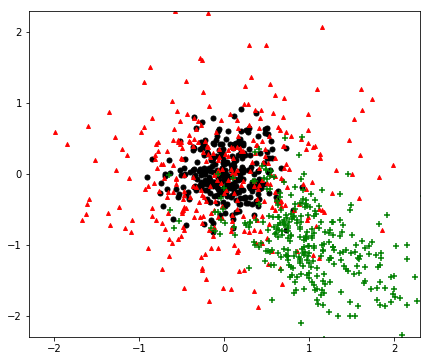

In [5]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

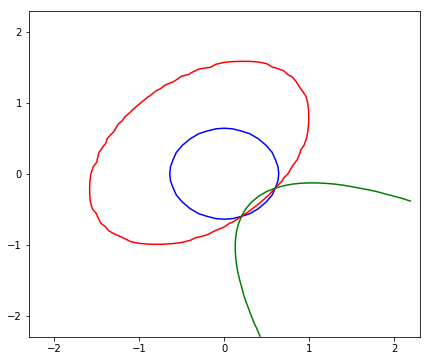

In [6]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


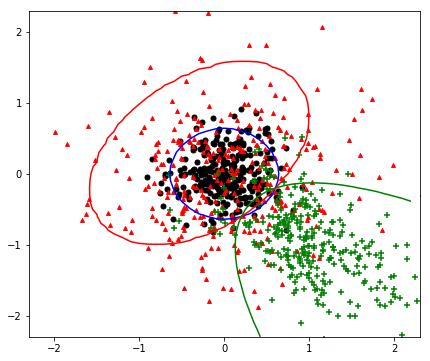

In [7]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [8]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848732
0.2153927930184836


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)


######



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

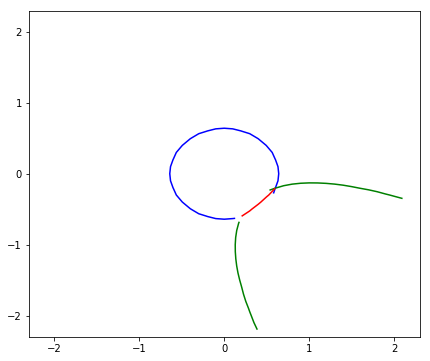

In [11]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boundary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boundary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.1)
feature_y_rec = np.arange(-0.6, -0.19, 0.1)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boundary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boundary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boundary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boundary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boundary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

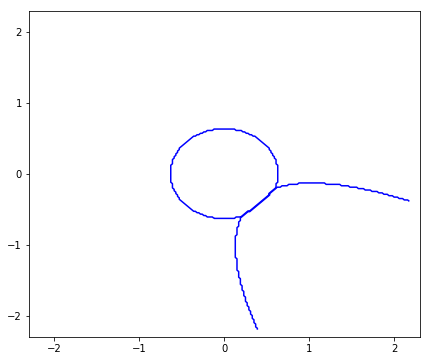

In [12]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.02)
feature_y = np.arange(-2.2, 2.2, 0.02)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z_bayes = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z_bayes, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


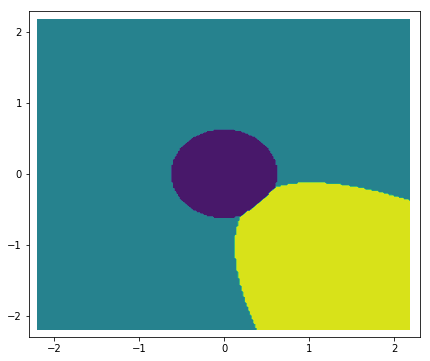

In [13]:
fig, ax = plt.subplots(1, 1)

ax.contourf(grid_X, grid_Y, Z_bayes)

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

We can't use dropout with sklearn's MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [15]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [16]:
(y - 1)[:10]

array([1, 0, 1, 2, 0, 0, 2, 2, 0, 1])

In [17]:
y[:10]

array([2, 1, 2, 3, 1, 1, 3, 3, 1, 2])

In [18]:
y_train[:10]

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [19]:
X_train.shape

(900, 2)

In [20]:
X_train

array([[ 0.00730001,  1.12998168],
       [-0.06280725,  1.30107506],
       [-1.65228925, -0.38958818],
       ...,
       [-0.49944831, -0.42163808],
       [-1.37156629,  0.43723491],
       [ 1.33719743, -1.00566283]])

In [21]:
y_train

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [22]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [23]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train loss: 0.5949848890304565
Train accuracy: 0.7488889098167419


In [27]:
feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z_neural_network = np.vectorize(get_predict_result)(grid_X, grid_Y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


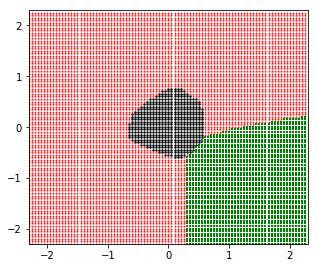

In [28]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

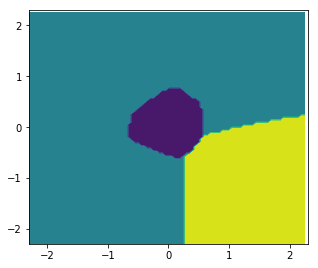

In [29]:
fig, ax = plt.subplots()

ax.contourf(grid_X, grid_Y, Z_neural_network)

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

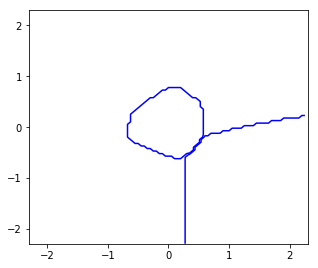

In [30]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

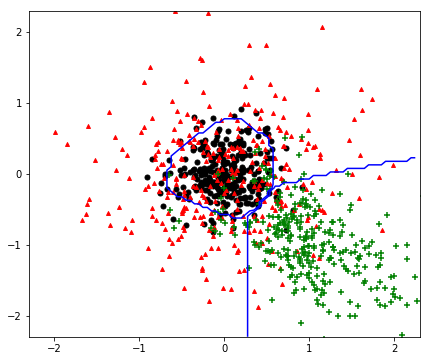

In [31]:
fig, ax = plt.subplots()

plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

### Plot the Neural Network structure weights

In [32]:
from keras.utils.vis_utils import plot_model

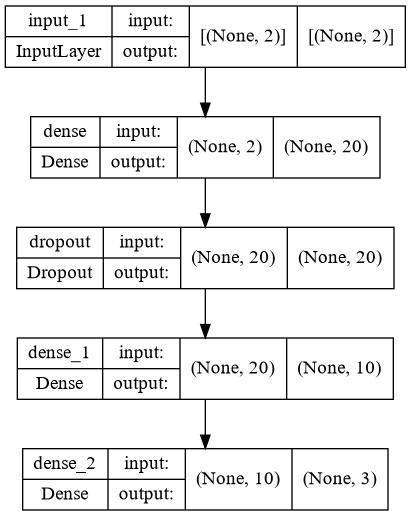

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
for layer in model.layers:
    print("\n\n////////////////////////////////////\n")
    print(layer.get_config())
    print("\n")
    print(layer.get_weights())




////////////////////////////////////

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


[array([[-2.5716295 ,  0.86250836, -0.02281681,  2.924873  ,  0.03201452,
         0.08975643,  2.812494  ,  2.4341476 , -2.4809265 ,  0.10190107,
        -2.4078224 ,  0.16272566,  0.02311695,  0.00771705,  0.00422155,
        -2.560968  , -1.7544576 ,  2.7443373 , -2.0982542 ,  2.4795694 ],
       [-0.53326565,  1.4423935 ,  1.7249267 , -0.66461366,  2.025579  ,
         2.1523826 , -0.6803997 , -1.0133669 , -0.5051685 ,  2.1216612 ,
        -0.3988407 ,  2.3314679 ,  2.2385306 ,  2.1021495 , -3.003578  ,
        -0.49920335,  0.02477068, -0.21523666, -1.7953507 ,

In [35]:
model.layers[-1].get_weights()

[array([[ 1.5527067e-01,  7.8202337e-02, -2.5400858e+00],
        [ 3.3502050e-03, -4.2008013e-01, -1.6299090e-01],
        [-3.9650197e+00,  3.3686590e-01,  1.7314939e+00],
        [-3.8070824e+00,  2.1120458e+00, -1.3275214e-01],
        [-2.7653253e+00,  2.3232176e+00, -7.8340578e-01],
        [-3.2496276e+00, -5.9987110e-01,  2.3171518e+00],
        [-1.5026517e+00, -8.1762040e-01,  1.9155245e+00],
        [ 7.8091958e-05, -3.2516250e-01, -3.8642593e-02],
        [ 1.5671988e+00, -4.2069973e-03, -1.7116486e+00],
        [-1.9317280e-01, -1.7040265e-01, -1.6427228e+00]], dtype=float32),
 array([ 0.34572765, -0.27889538,  0.02714256], dtype=float32)]

In [36]:
# prepare for Equation (38)

array_beta_0k_hat = model.layers[-1].get_weights()[1]
array_beta_0k_hat

array([ 0.34572765, -0.27889538,  0.02714256], dtype=float32)

In [37]:
# prepare for Equation (B.3)

array_beta_jk_hat = model.layers[-1].get_weights()[0]
array_beta_jk_hat

array([[ 1.5527067e-01,  7.8202337e-02, -2.5400858e+00],
       [ 3.3502050e-03, -4.2008013e-01, -1.6299090e-01],
       [-3.9650197e+00,  3.3686590e-01,  1.7314939e+00],
       [-3.8070824e+00,  2.1120458e+00, -1.3275214e-01],
       [-2.7653253e+00,  2.3232176e+00, -7.8340578e-01],
       [-3.2496276e+00, -5.9987110e-01,  2.3171518e+00],
       [-1.5026517e+00, -8.1762040e-01,  1.9155245e+00],
       [ 7.8091958e-05, -3.2516250e-01, -3.8642593e-02],
       [ 1.5671988e+00, -4.2069973e-03, -1.7116486e+00],
       [-1.9317280e-01, -1.7040265e-01, -1.6427228e+00]], dtype=float32)

In [38]:
# Equation (38)

array_beta_0k_asterisk = array_beta_0k_hat - np.average(array_beta_0k_hat, axis=0)
array_beta_0k_asterisk

array([ 0.3144027 , -0.31022033, -0.00418239], dtype=float32)

In [39]:
# Equation (B.3)

array_beta_jk_asterisk = array_beta_jk_hat - np.average(array_beta_jk_hat, axis=1).reshape(10, 1)
array_beta_jk_asterisk

array([[ 0.9241415 ,  0.8470732 , -1.771215  ],
       [ 0.19659048, -0.22683984,  0.03024939],
       [-3.3327997 ,  0.9690859 ,  2.363714  ],
       [-3.1978195 ,  2.7213087 ,  0.47651082],
       [-2.3568208 ,  2.731722  , -0.3749013 ],
       [-2.7388453 , -0.0890888 ,  2.827934  ],
       [-1.3677359 , -0.68270457,  2.0504403 ],
       [ 0.12132043, -0.20392016,  0.08259974],
       [ 1.6167511 ,  0.04534528, -1.6620963 ],
       [ 0.47559327,  0.49836344, -0.97395676]], dtype=float32)

In [40]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337

# Check if the final output of the Neural Network is OK.

def get_array_softmax_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2, 3]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(tf.convert_to_tensor(y_pred), alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    output = keras.activations.softmax(tf.convert_to_tensor(y_pred.reshape(-1, 1)), axis=0).numpy()
    return output

print(get_array_softmax_j(model,  np.array([-0.3, 0.3])))
print(get_array_softmax_j(model,  np.array([-2, 2])))
print(get_array_softmax_j(model,  np.array([2, -2])))

[[0.77116723]
 [0.18893351]
 [0.03989926]]
[[0.10011948]
 [0.89697146]
 [0.00290906]]
[[6.66571846e-07]
 [1.94517442e-02]
 [9.80547589e-01]]


In [41]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337
# https://stackoverflow.com/questions/46432325/dropout-setting-layer-weights-array-to-empty
# https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow
# https://stackoverflow.com/questions/46134891/why-an-extra-comma-in-the-shape-of-a-single-index-numpy-array
# https://stackoverflow.com/questions/27570756/difference-between-these-array-shapes-in-numpy
# https://stackoverflow.com/questions/32722843/transform-an-array-of-shape-n-to-a-numpy-array-of-shape-n-1
# https://www.codingem.com/numpy-at-operator/

# calculate array_phi and array_mu, as described in the paragraph below Equation (35)

def get_array_phi_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    return keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()

def get_array_mu_j(_model, _array_input):
    list_of_array_phi = []
    for _one_input in _array_input:
        list_of_array_phi.append(get_array_phi_j(_model, _one_input))
    array_of_array_phi = np.array(list_of_array_phi)
    avg = np.average(array_of_array_phi, axis=0)
    return avg

print(get_array_phi_j(model, np.array([0, 0])))
print(get_array_phi_j(model, np.array([0, 0])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1).shape)

[0.22501259 0.         0.         0.01418624 0.         0.14453952
 0.26953089 0.         0.71125048 0.07496762]
(10,)
[0.21824431 0.         0.         0.08433187 0.19869015 0.26247612
 0.20094505 0.         0.71318233 0.03748381]
(10,)
[[0.21824431]
 [0.        ]
 [0.        ]
 [0.08433187]
 [0.19869015]
 [0.26247612]
 [0.20094505]
 [0.        ]
 [0.71318233]
 [0.03748381]]
(10, 1)


In [42]:
print(get_array_mu_j(model, X_train))

[0.2363205  0.         0.13809136 0.20250655 0.12815568 0.26555884
 0.27000632 0.         0.67484448 0.07306101]


In [43]:
# Equation (38)

def get_array_alpha_jk_asterisk(_model, _array_input):
    _array_mu_j = get_array_mu_j(_model, _array_input)
    _array_alpha_jk_asterisk = np.zeros((10, 3))
    for k in range(3):
        for j in range(10):
            t1 = array_beta_0k_asterisk[k]
            t2 = np.sum(np.array([array_beta_jk_asterisk[s, k] * _array_mu_j[s] for s in range(10)]))
            t3 = array_beta_jk_asterisk[j, k] * _array_mu_j[j]
            _array_alpha_jk_asterisk[j, k] = 1 / 10 * (t1 + t2) - t3
    return _array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])))
print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])).shape)

[[-0.2061606  -0.13113309  0.33729374]
 [-0.00447198  0.05373581 -0.04926384]
 [-0.00447198  0.05373581 -0.04926384]
 [ 0.26520612 -0.17575724 -0.08944889]
 [ 0.46380511 -0.48903046  0.02522535]
 [ 0.71440952  0.07711949 -0.79152899]
 [ 0.27036778  0.19092192 -0.46128968]
 [-0.00447198  0.05373581 -0.04926384]
 [-1.15751027  0.02139636  1.13611384]
 [-0.02229902  0.03505525 -0.01275623]]
(10, 3)


In [44]:
array_alpha_jk_asterisk = get_array_alpha_jk_asterisk(model, X_train)
print(array_alpha_jk_asterisk)

[[-0.30318088 -0.12178372  0.42496465]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.37544355 -0.05542535 -0.32001824]
 [ 0.56279208 -0.47268578 -0.09010631]
 [ 0.21725268 -0.27168866  0.05443598]
 [ 0.64253731  0.10205536 -0.74459264]
 [ 0.28451003  0.26273159 -0.54724159]
 [-0.0847873   0.07839704  0.00639025]
 [-1.17584284  0.04779603  1.12804674]
 [-0.11953462  0.04198611  0.07754852]]


In [45]:
# Equation (25)

def get_array_w_jk(_model, px, py):
    array_phi_j = get_array_phi_j(_model, [px, py])
    # https://numpy.org/doc/stable/reference/generated/numpy.diagflat.html#numpy.diagflat
    matrix_diagflat_mu_j = np.diagflat(array_phi_j)
    first_term = matrix_diagflat_mu_j @ array_beta_jk_asterisk
    return first_term + array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_w_jk(model, 0, 0))

[[-0.09523741  0.06881842  0.02641899]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.37544355 -0.05542535 -0.32001824]
 [ 0.51742705 -0.43408065 -0.08334641]
 [ 0.21725268 -0.27168866  0.05443598]
 [ 0.24666591  0.08917851 -0.33584441]
 [-0.08413703  0.07872162  0.0054154 ]
 [-0.0847873   0.07839704  0.00639025]
 [-0.02592786  0.08004788 -0.05412002]
 [-0.08388053  0.07934723  0.0045333 ]]


In [46]:
print(get_array_w_jk(model, 2, -2))

[[-0.30318088 -0.12178372  0.42496465]
 [-0.0847873   0.07839704  0.00639025]
 [-1.43820859  0.47193448  0.96627417]
 [-1.72557321  1.47468755  0.25088568]
 [-0.29412107  0.3210297  -0.02690863]
 [-2.41835356  0.00249111  2.41586234]
 [-0.80829932 -0.28274356  1.09104281]
 [-0.0847873   0.07839704  0.00639025]
 [-0.88407858  0.05597919  0.82809934]
 [-0.11953462  0.04198611  0.07754852]]


In [47]:
print(get_array_w_jk(model, -2, 2))

[[ 0.26688506  0.40074186 -0.66762702]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.37544355 -0.05542535 -0.32001824]
 [-0.41823596  0.36215813  0.05607783]
 [-1.03731725  1.18244667 -0.14512942]
 [ 0.64253731  0.10205536 -0.74459264]
 [ 0.28451003  0.26273159 -0.54724159]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.53612998  0.09581201 -0.63194196]
 [-0.03175349  0.13396997 -0.10221649]]


In [48]:
print(get_array_w_jk(model, 0.1, 0.1))

[[-0.10583622  0.05910349  0.04673273]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.37544355 -0.05542535 -0.32001824]
 [ 0.5328881  -0.44723783 -0.08565028]
 [ 0.14971654 -0.1934095   0.04369296]
 [ 0.08082091  0.08378393 -0.16460483]
 [-0.08601185  0.07778581  0.00822604]
 [-0.0847873   0.07839704  0.00639025]
 [-0.03712662  0.07973379 -0.04260717]
 [-0.09143945  0.0714264   0.02001305]]


In [49]:
print(get_array_w_jk(model, -0.3, 0.3))

[[-0.0421654   0.11746452 -0.07529914]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.37544355 -0.05542535 -0.32001824]
 [ 0.51546101 -0.43240757 -0.08305345]
 [ 0.11879363 -0.15756767  0.03877403]
 [ 0.60846036  0.10094691 -0.70940724]
 [ 0.05355938  0.14745271 -0.20101208]
 [-0.0847873   0.07839704  0.00639025]
 [ 0.07022652  0.08274474 -0.15297125]
 [-0.07418525  0.08950669 -0.01532144]]


In [61]:
# Equation (31)

def get_m_theta_k(_model, _px, _py, which): # which = 0, 1, or 2
    _array_w_jk = get_array_w_jk(_model, _px, _py)
    _array_w_jk_pos_masked = np.ma.masked_less(_array_w_jk, 0).filled(0)
    _array_w_jk_neg_masked = -1 * np.ma.masked_greater(_array_w_jk, 0).filled(0)
    _array_w_jk_pos_sum = _array_w_jk_pos_masked.sum(axis=0).tolist()
    _array_w_jk_neg_sum = _array_w_jk_neg_masked.sum(axis=0).tolist()
    w_pos_all = _array_w_jk_pos_sum
    w_neg_all = _array_w_jk_neg_sum
    w_pos_which = _array_w_jk_pos_sum[which]
    w_neg_which = _array_w_jk_neg_sum[which]
    w_pos_others = _array_w_jk_pos_sum[0 : which] + _array_w_jk_pos_sum[which + 1 : ]
    w_neg_others = _array_w_jk_neg_sum[0 : which] + _array_w_jk_neg_sum[which + 1 : ]
    eta_pos = 1.0 / (np.sum(np.array(list(map(lambda wp: np.exp(wp), w_pos_all)))) - 3.0 + 1.0)
    eta_neg = 1.0 / (1.0 - np.prod(np.array(list(map(lambda wn: 1 - np.exp(-1 * wn), w_neg_all))), dtype="float32"))
    kappa = np.sum(np.array([eta_pos * (np.exp(wp) - 1) * (1 - eta_neg * np.exp(-1.0 * wn)) for wp, wn in zip(w_pos_all, w_neg_all)]))
    eta = 1.0 / (1.0 - kappa)
    m_outer = eta * eta_pos * eta_neg * np.exp(-1 * w_neg_which)
    m_inner = np.exp(w_pos_which) - 1.0 + np.prod(np.array([1 - np.exp(-1 * wn) for wn in w_neg_others]), dtype="float32")
    m = m_outer * m_inner
    return m

get_m_theta_k(model, -0.3, 0.3, 0)
get_m_theta_k(model, 2, -2, 2)

0.9805184855362403

In [62]:
# Equation (31)

def get_m_A(_model, _px, _py, A): # which = 0, 1, or 2
    _array_w_jk = get_array_w_jk(_model, _px, _py)
    _array_w_jk_pos_masked = np.ma.masked_less(_array_w_jk, 0).filled(0)
    _array_w_jk_neg_masked = -1 * np.ma.masked_greater(_array_w_jk, 0).filled(0)
    _array_w_jk_pos_sum = _array_w_jk_pos_masked.sum(axis=0).tolist()
    _array_w_jk_neg_sum = _array_w_jk_neg_masked.sum(axis=0).tolist()
    w_pos_all = _array_w_jk_pos_sum
    w_neg_all = _array_w_jk_neg_sum
    w_pos_A = [_array_w_jk_pos_sum[e]  for e in A]
    w_neg_A = [_array_w_jk_neg_sum[e]  for e in A]
    w_pos_others = [_array_w_jk_pos_sum[e]  for e in range(0, 3) if e not in A]
    w_neg_others = [_array_w_jk_neg_sum[e]  for e in range(0, 3) if e not in A]
    eta_pos = 1.0 / (np.sum(np.array(list(map(lambda wp: np.exp(wp), w_pos_all)))) - 3.0 + 1.0)
    eta_neg = 1.0 / (1.0 - np.prod(np.array(list(map(lambda wn: 1 - np.exp(-1 * wn), w_neg_all))), dtype="float32"))
    kappa = np.sum(np.array([eta_pos * (np.exp(wp) - 1) * (1 - eta_neg * np.exp(-1.0 * wn)) for wp, wn in zip(w_pos_all, w_neg_all)]))
    eta = 1.0 / (1.0 - kappa)
    m1 = eta * eta_pos * eta_neg
    m2 = np.prod(np.array([1 - np.exp(-1 * wn) for wn in w_neg_others]), dtype="float32")
    m3 = np.prod(np.array([np.exp(-1 * wn) for wn in w_neg_A]), dtype="float32")
    m = m1 * m2 * m3
    return m

get_m_A(model, -0.3, 0.3, [0, 1])

0.062426891024323604

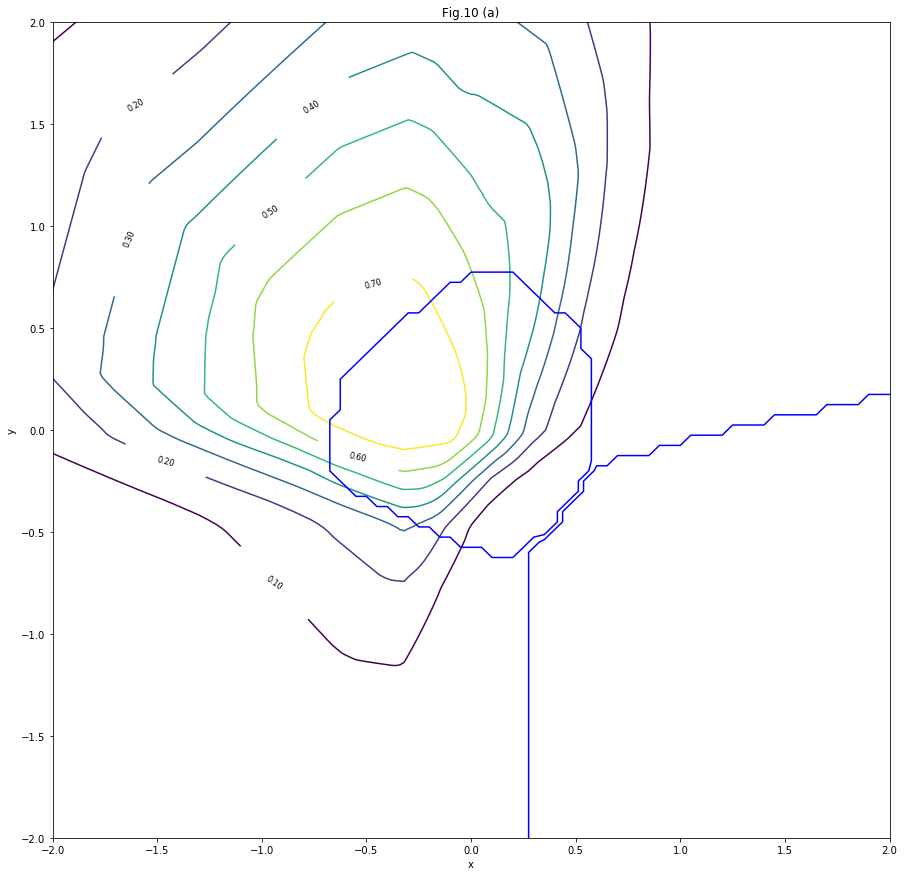

In [69]:
# Plot Figure 10 (a)

def get_m_theta_for_class_1(_px, _py):
    return get_m_theta_k(model, _px, _py, 0)

arr_x = np.arange(-2.0, 2.05, 0.02)
arr_y = np.arange(-2.0, 2.05, 0.02)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_1)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (a)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


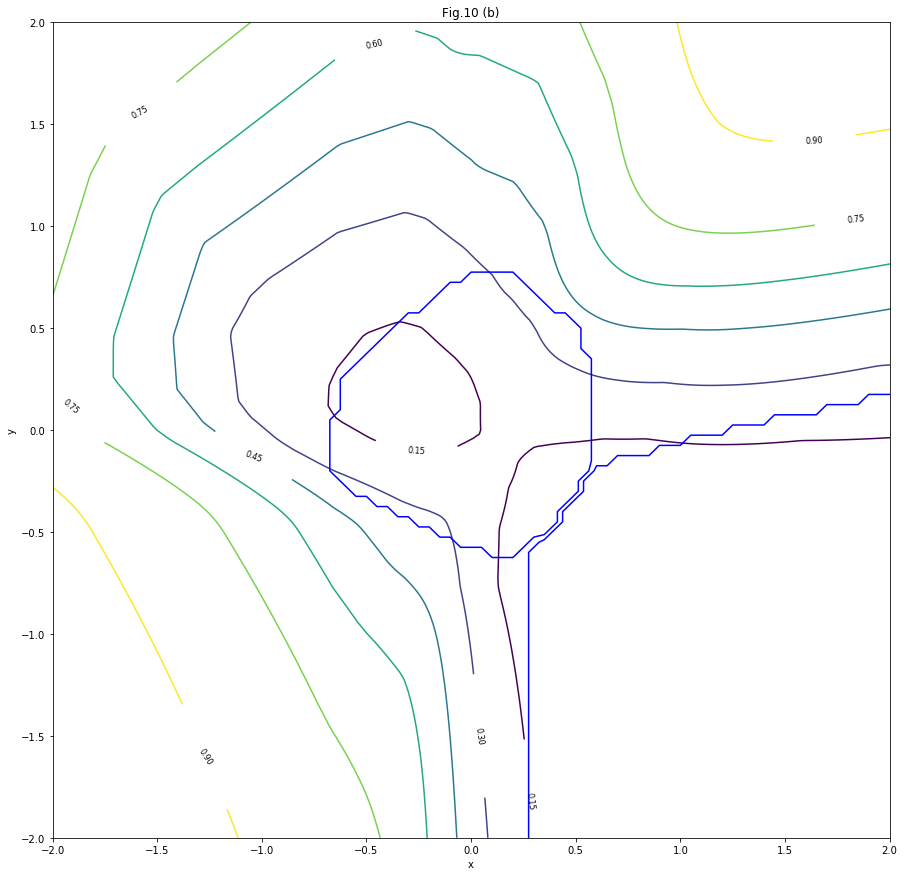

In [70]:
# Plot Figure 10 (b)

def get_m_theta_for_class_2(_px, _py):
    return get_m_theta_k(model, _px, _py, 1)

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_2)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (b)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


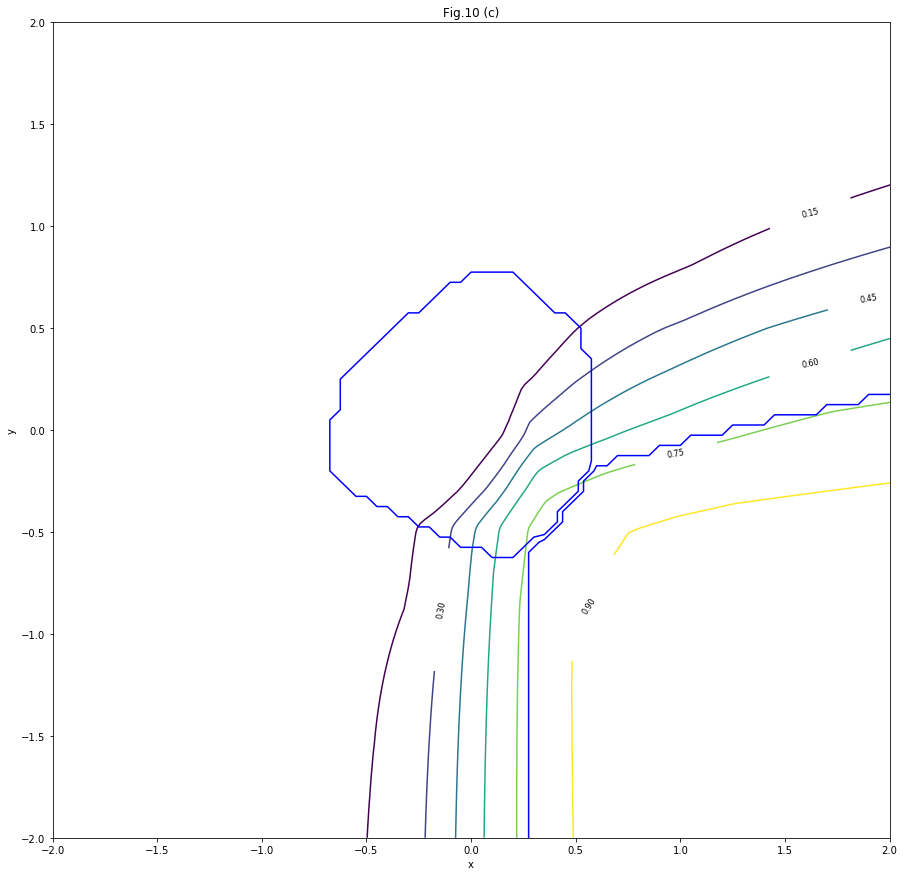

In [71]:
# Plot Figure 10 (c)

def get_m_theta_for_class_3(_px, _py):
    return get_m_theta_k(model, _px, _py, 2)

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_3)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


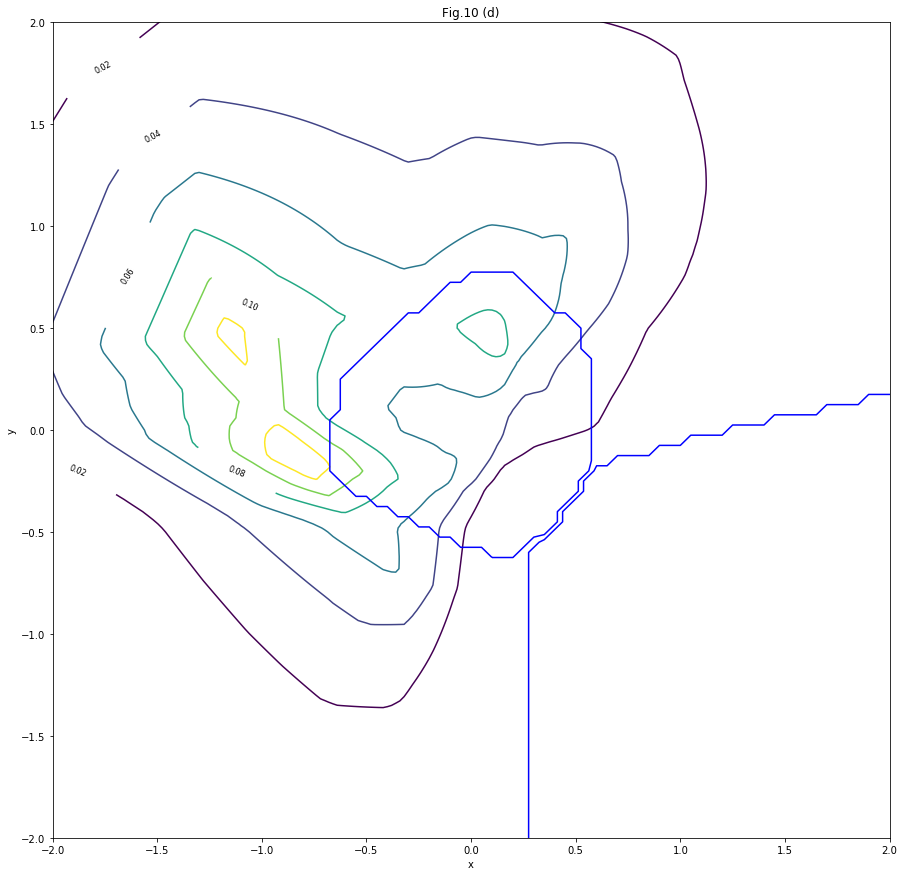

In [72]:
# Plot Figure 10 (d)

def get_m_A_for_class_1_and_2(_px, _py):
    return get_m_A(model, _px, _py, [0, 1])

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_A_for_class_1_and_2)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (d)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


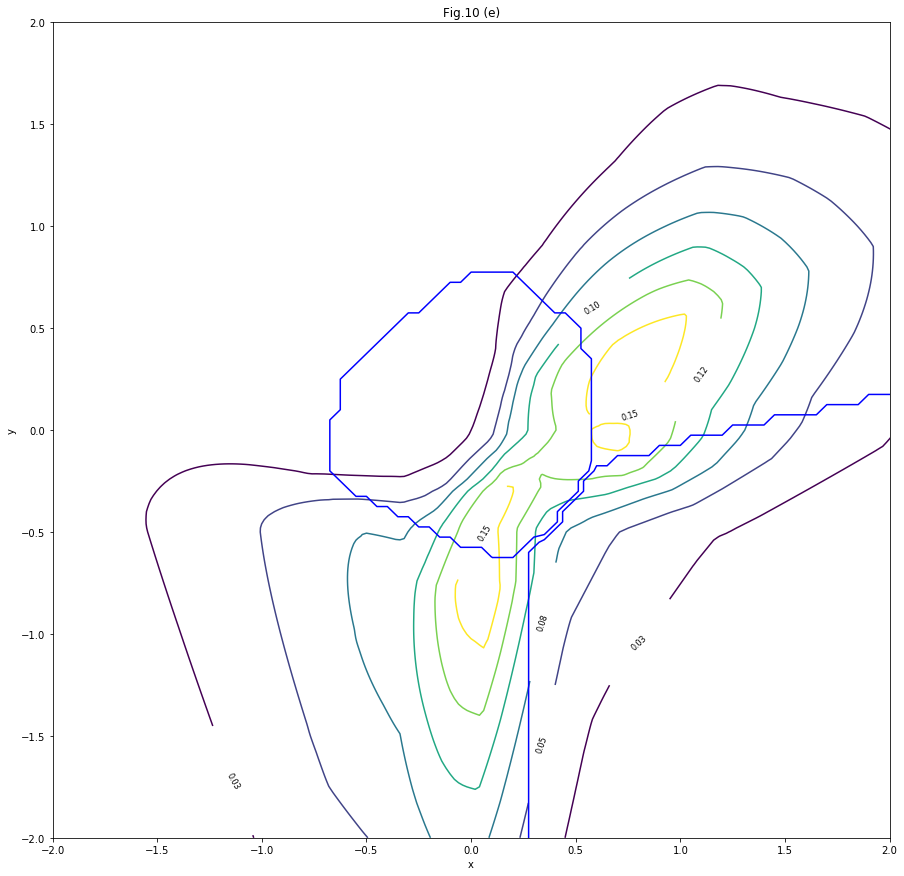

In [73]:
# Plot Figure 10 (e)

def get_m_A_for_class_2_and_3(_px, _py):
    return get_m_A(model, _px, _py, [1, 2])

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_A_for_class_2_and_3)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (e)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


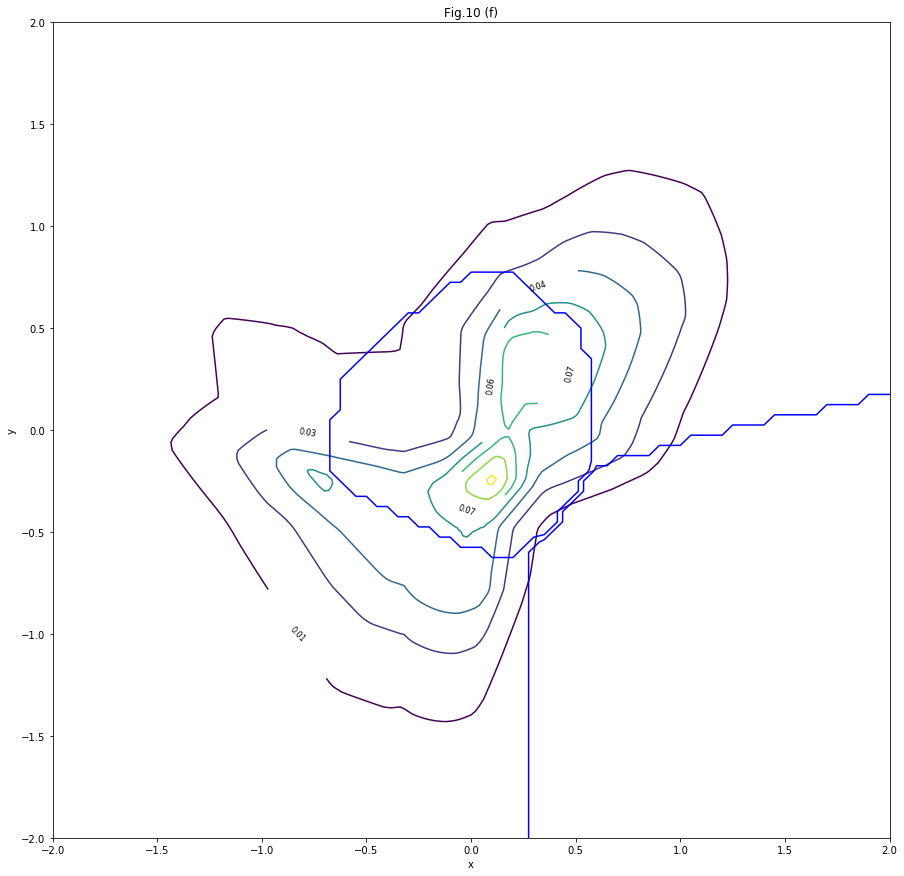

In [74]:
# Plot Figure 10 (f)

def get_m_A_for_class_ignorance(_px, _py):
    return get_m_A(model, _px, _py, [0, 1, 2])

# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_A_for_class_ignorance)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (f)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
